In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [3]:
# Вспомогательная функция для вычисления радиальной части полиномов Цернике
def R(n, m, r):
    """Функция для расчета радиальной части полинома Цернике"""
    if (n - m) % 2 != 0:
        return np.zeros_like(r)  # Если разность нечетная, результат 0

    radial_sum = np.zeros_like(r)
    for k in range((n - m) // 2 + 1):
        c = (-1) ** k * factorial(n - k) / (factorial(k) * factorial((n + m) // 2 - k) * factorial((n - m) // 2 - k))
        radial_sum += c * r ** (n - 2 * k)
    return radial_sum

In [4]:
# Вспомогательная функция для вычисления радиальной части полиномов Цернике
def R(n, m, r):
    """Функция для расчета радиальной части полинома Цернике"""
    if (n - m) % 2 != 0:
        return np.zeros_like(r)  # Если разность нечетная, результат 0

    radial_sum = np.zeros_like(r)
    for k in range((n - m) // 2 + 1):
        c = (-1) ** k * factorial(n - k) / (factorial(k) * factorial((n + m) // 2 - k) * factorial((n - m) // 2 - k))
        radial_sum += c * r ** (n - 2 * k)
    return radial_sum

In [5]:
# Функция для обрезки изображения до центральной части 128x128
def crop_center(img, crop_size=128):
    h, w = img.shape
    startx = w // 2 - (crop_size // 2)
    starty = h // 2 - (crop_size // 2)    
    return img[starty:starty + crop_size, startx:startx + crop_size]

In [6]:

# Основная функция для вычисления полиномов Цернике
def zernike_polynomial(n, m, rho, theta):
    """
    Вычисление полинома Цернике.
    n - радиальный порядок
    m - азимутальный порядок
    rho - радиальная координата (от 0 до 1)
    theta - угловая координата (от 0 до 2pi)
    """
    if m >= 0:
        return R(n, m, rho) * np.cos(m * theta)
    else:
        return R(n, -m, rho) * np.sin(-m * theta)

# Пример визуализации полинома Цернике
def plot_zernike(n, m, a, b, grid_size=100):
    """Визуализация полинома Цернике с порядками n и m"""
    y, x = np.linspace(-1, 1, grid_size), np.linspace(-1, 1, grid_size)
    X, Y = np.meshgrid(x, y)
    rho = np.sqrt(X**2 + Y**2)
    theta = np.arctan2(Y, X)
    
    # Ограничиваем область единичным кругом
    mask = rho <= 1
    rho[~mask] = 0
    theta[~mask] = 0
    
    Z = zernike_polynomial(n, m, rho, theta)
    Z1 = np.exp(1j * a * Z)

    Z1a = np.exp(1j * (a * Z + b * np.sqrt(X ** 2 + Y ** 2)))

    Zf = np.fft.fftshift(np.fft.fft2(Z, s=[1000, 1000]))

    Z1f = np.fft.fftshift(np.fft.fft2(Z1, s=[1000, 1000]))

    Z1af = np.fft.fftshift(np.fft.fft2(Z1a, s=[512, 512]))

  # Создание сетки 2x2 для отображения графиков
    fig, axs = plt.subplots(2, 2, figsize=(12, 12))

    # # График 1: Исходный полином Цернике
    #img1 = plt.imshow(Z, extent=(-1, 1, -1, 1), cmap='RdBu')

    # График 1: Фаза исходного поля

    # img1 = axs[0, 0].imshow(abs(Z), extent=(-1, 1, -1, 1), cmap='RdBu')
    # axs[0, 0].set_title(f"Zernike Polynomial (n={n}, m={m})")
    # plt.colorbar(img1, ax=axs[0, 0])

    # # График 2: Фурье-преобразование исходного полинома
    # img2 = axs[0, 1].imshow(abs(Zf), extent=(-1, 1, -1, 1), cmap='grey')
    # axs[0, 1].set_title(f"Zernike Polynomial amplitude (n={n}, m={m})")
    # plt.colorbar(img2, ax=axs[0, 1])

        # График 3: Фазовая картина с наложением аксикона
    img3 = axs[0, 0].imshow(np.angle(Z1), extent=(-1, 1, -1, 1), cmap='RdBu')
    axs[0, 0].set_title(f"Zernike Polynomial phase (n={n}, m={m}, b=0)")
    plt.colorbar(img3, ax=axs[0, 0])

        # График 3: Фазовая картина с наложением аксикона
    img4 = axs[0, 1].imshow(abs(Z1f), extent=(-1, 1, -1, 1), cmap='grey')
    axs[0, 1].set_title(f"Zernike Polynomial phase amplitude (n={n}, m={m}, b=0)")
    plt.colorbar(img4, ax=axs[0, 1])

    # График 3: Фазовая картина с наложением аксикона
    img3 = axs[1, 0].imshow(np.angle(Z1a), extent=(-1, 1, -1, 1), cmap='RdBu')
    axs[1, 0].set_title(f"Zernike Polynomial phase (n={n}, m={m}, b={b})")
    plt.colorbar(img3, ax=axs[1, 0])

        # График 3: Фазовая картина с наложением аксикона
    img4 = axs[1, 1].imshow(abs(Z1af), extent=(-1, 1, -1, 1), cmap='grey')
    axs[1, 1].set_title(f"Zernike Polynomial phase amplitude (n={n}, m={m}, b={b})")
    plt.colorbar(img4, ax=axs[1, 1])

    plt.imsave(f'TestImages/zernike_aberration_n{n}_m{m}_a{a:.2f}_b{b:.2f}_aug.png', crop_center(abs(Z1af)), cmap='gray')

    # Отображаем графики
    plt.tight_layout()
    plt.show()



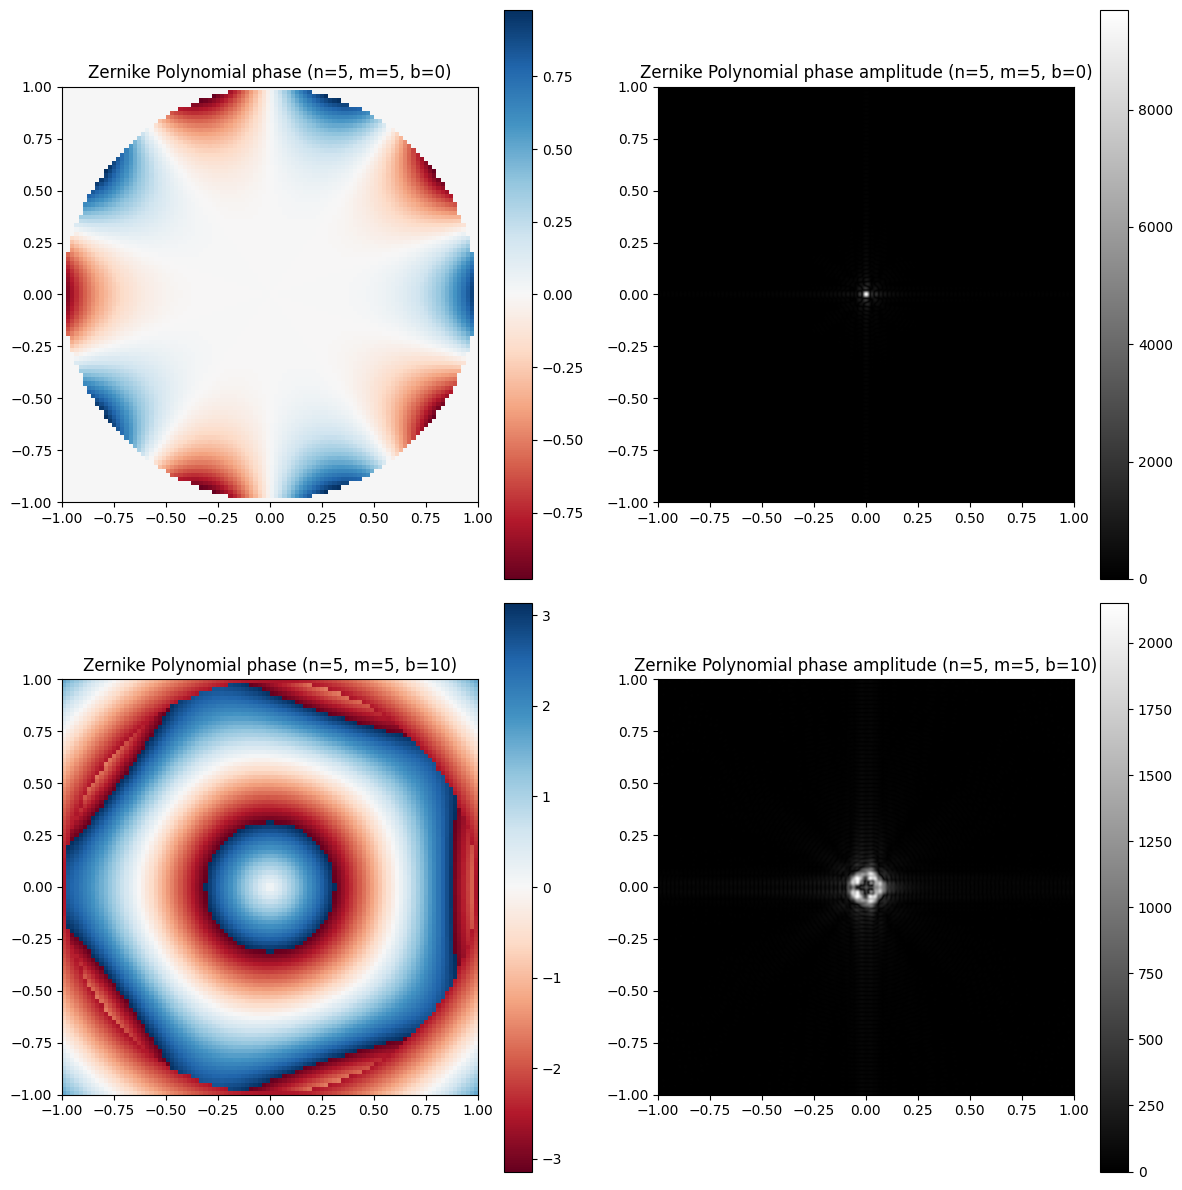

In [14]:
# Пример построения полинома Цернике
#            n  m  a   b
plot_zernike(5, 5, 1, 10) # Полином Цернике с порядками n=3, m=1

# Data set n, m, (a?) + augmentation, axicon
# 2 -> 1, 4 -> 3 распознать типо
# Распознать по fft => zernike 